## Case study on Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
car_sales = pd.read_csv("car_age_price.csv")

In [3]:
car_sales.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
car_sales.shape

(112, 2)

In [5]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
car_sales.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [7]:
#number of cars developed in particular year
years = car_sales["Year"].value_counts().sort_index()
years

2013     4
2014     6
2015    22
2016     6
2017    47
2018    11
2019    12
2020     4
Name: Year, dtype: int64

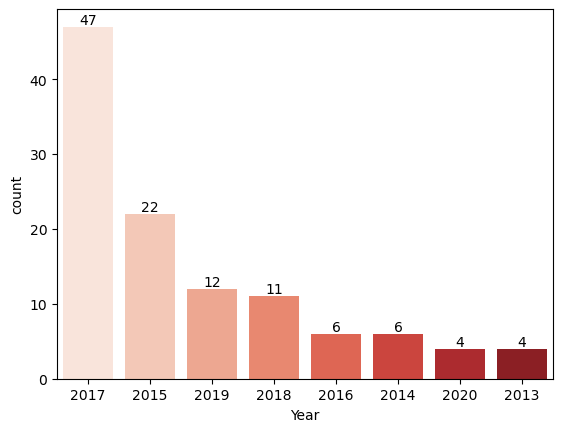

In [8]:
ax = sns.countplot(data = car_sales, x = "Year", palette="Reds", order = car_sales["Year"].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

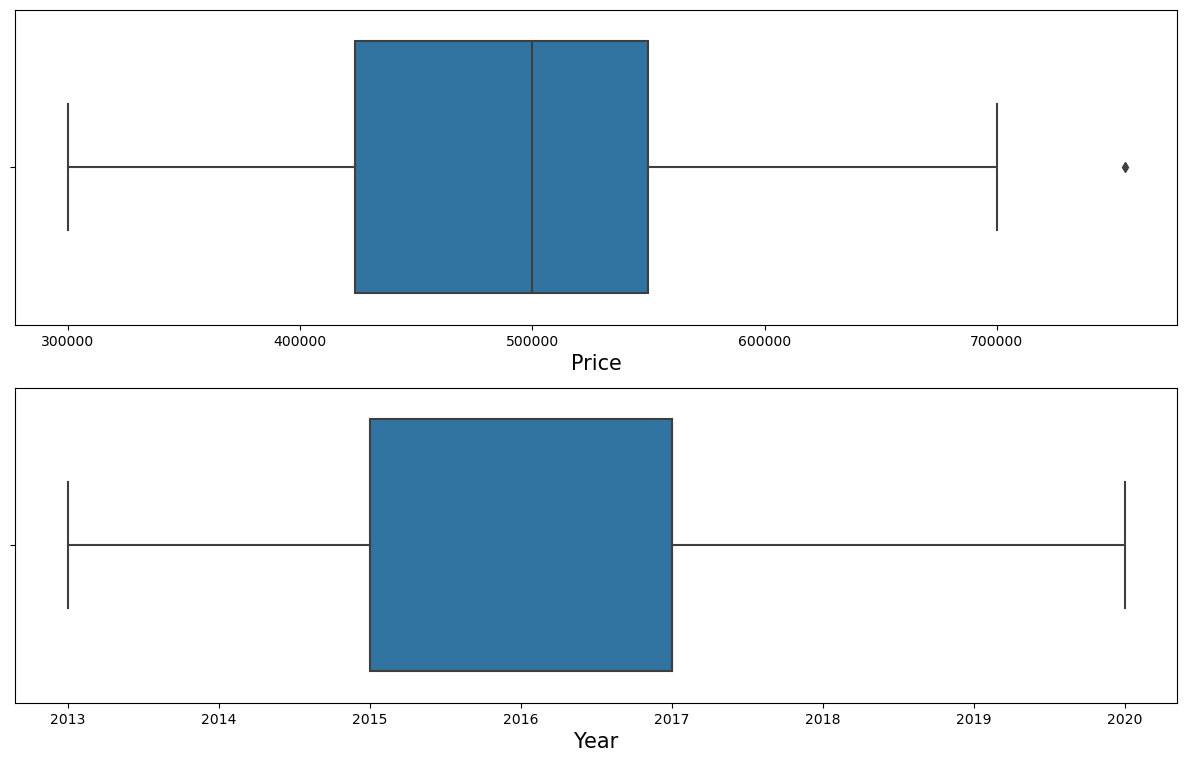

In [9]:
#checking outliers

plt.figure(figsize=(15,9))

plt.subplot(2,1,1)
sns.boxplot(data = car_sales, x="Price")
plt.xlabel("Price", fontsize=15 )


plt.subplot(2,1,2)
sns.boxplot(data = car_sales, x="Year")
plt.xlabel("Year", fontsize=15 )

plt.show()

In [10]:
#Preprocessing
#Assigning feature varible and target varible

x1 = car_sales["Year"]
y1 = car_sales["Price"]

In [11]:
#Scaling

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

#reshaping feature and target varible
x = x1.values.reshape(-1,1)
y = y1.values.reshape(-1,1)

#transforming values
x = scalar.fit_transform(x)
y = scalar.fit_transform(y)

In [12]:
#splitting data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)

* Find the best linear relationship between year and price.

In [13]:
#linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

LinearRegression()

In [14]:
#prediction and evaluation of model on testing data

y_pred = lr_model.predict(x_test)
accuracy = lr_model.score(y_test,y_pred)
accuracy

0.49266502168795967

In [15]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.5895295935049284
0.52470677333406


* Can you predict the possible price of a 2022 model second-hand grand i10?

In [16]:
test_data = 2022

#reshaping data
test_data = np.array(test_data)
test_data = test_data.reshape(-1,1)

#scaling the new data
testdata_scaled = scalar.transform(test_data)

#model pediction
y_pred1 = lr_model.predict(testdata_scaled)

#inversing the scaling transformation to get the original value rather than the scaled value
predictedprice = scalar.inverse_transform(y_pred1)

#converting array to float
price = np.float64(predictedprice)

In [17]:
print(f"Predicted  possible price of a 2022 model second-hand grand i10 : {price:.2f}")

Predicted  possible price of a 2022 model second-hand grand i10 : 80005.58


In [18]:
#lasso regression model and linear regression

from sklearn.linear_model import Lasso

#Lasso regression model
lassoreg_model = Lasso(alpha=2)
lassoreg_model.fit(x_train,y_train)


#linear regression model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [19]:
#prediction of lasso regression model using test data
lasso_pred = lassoreg_model.predict(x_test)

#prediction of linear regression model using test data
linear_pred = linear_model.predict(x_test)

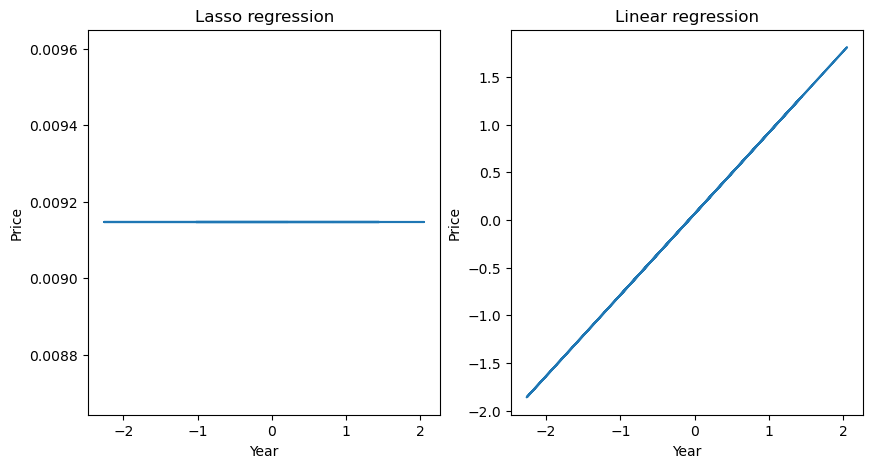

In [20]:
# ploting graph between the tesing and predicted values of both lasso and linear regression model
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(x_test, lasso_pred)
plt.title("Lasso regression")
plt.xlabel("Year")
plt.ylabel("Price")

plt.subplot(1,2,2)
plt.plot(x_test, linear_pred)
plt.title("Linear regression")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

In [21]:
# Evaluating the models
print("MAE score lasso regression model: ",mean_absolute_error( y_test, lasso_pred))
print("MSE score lasso regression model: ",mean_squared_error( y_test, lasso_pred))

print("\n ")

print("MAE score linear regression model: ",mean_absolute_error(y_test, linear_pred))
print("MSE score linear regression model: ",mean_squared_error(y_test, linear_pred))

MAE score lasso regression model:  0.7093301206881746
MSE score lasso regression model:  0.831681687996886

 
MAE score linear regression model:  0.5895295935049284
MSE score linear regression model:  0.52470677333406


* Here in this case, the linear regression model performs better when compared with lasso regression model because of the smaller dataset and also the linear relationship between the values.